# Data Cleaning and Exploration

## load dataset and inspect features for data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### load training features
features=pd.read_csv("train_features_2013-03-07.csv")
features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [11]:
##check if there is NULL in this dataset
print("----------check if there is NULL in this dataset------------")
print(features.apply(pd.notnull).all(axis=0))

print()
print()
print("---------check descriptive statistics for two continuous variables-------")
print(features.describe())


----------check if there is NULL in this dataset------------
jobId                  True
companyId              True
jobType                True
degree                 True
major                  True
industry               True
yearsExperience        True
milesFromMetropolis    True
dtype: bool


---------check descriptive statistics for two continuous variables-------
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


In [3]:
salary=pd.read_csv("train_salaries_2013-03-07.csv") #load train salary dataset
salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [15]:
print("----------check if there is NULL in this dataset------------")
print(salary.apply(pd.notnull).all(axis=0))


print()
print()

print("---------check descriptive statistics for two continuous variables-------")
print(salary.describe())
print()
print()


print("SPOT SOMETHING WRONG: salary shouldn't be 0!!!")

----------check if there is NULL in this dataset------------
jobId     True
salary    True
dtype: bool


---------check descriptive statistics for two continuous variables-------
               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000


SPOT SOMETHING WRONG: salary shouldn't be 0!!!


In [16]:
print("--------check if features and salary are exactly matching on jobId -----------")
salary[salary['jobId']!=features['jobId']] ## 

--------check if features and salary are exactly matching on jobId -----------


,jobId,salary


In [18]:
print('jobtype category:')
print(features['jobType'].value_counts())

print("---------------------")
print('industry category:')
print(features['industry'].value_counts())

print("---------------------")
print('degree category:')
print(features['degree'].value_counts())

print("---------------------")
print('major category:')
print(features['major'].value_counts())

print("---------------------")

jobtype category:
SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64
---------------------
industry category:
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64
---------------------
degree category:
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64
---------------------
major category:
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64
---------------------


In [20]:
print("Number of company:",len(np.unique(features['companyId'])))
print("Number of jobId:", features.shape[0])

Number of company: 63
Number of jobId: 1000000


### Join two dataset

In [29]:
print("-----------join two dataset------------")
print()
fea_salary_merge=features.merge(salary)
fea_salary_merge.head()

-----------join two dataset------------



,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### Data Cleaning

In [30]:
print("-----------Get rid of rows with salary being 0------------") 
print()
fea_salary_merge=fea_salary_merge[fea_salary_merge['salary']!=0]
print()
print(fea_salary_merge['salary'].describe())
print()
print("5 job post with salary 0 got removed")

-----------Get rid of rows with salary being 0------------


count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

5 job post with salary 0 got removed


In [26]:
# Degree None is missing or just no degree from or above high school??
# 
print("------salary group by degree----------")
print()
print("After checking I fonnd the average salary of people with degree None\
is less than that with degree from high school or above. so it may indicate \
that None is just no degree from or above high school")

fea_salary_merge[['degree','salary']].groupby(['degree']).mean()

------salary group by degree----------

After checking I fonnd the average salary of people with degree Noneis less than that with degree from high school or above. so it may indicate that None is just no degree from or above high school


,salary
degree,
BACHELORS,125.454663
DOCTORAL,135.489433
HIGH_SCHOOL,101.920654
MASTERS,130.504903
NONE,98.176467


In [29]:
## major none is missing?

print("------count group by degree----------")
print()
print(fea_salary_merge[['degree','salary']].groupby(['degree']).count())

print("------count group by major-----------")
print()
print(fea_salary_merge[['major','salary']].groupby(['major']).count())

print()
print("FOUND OUT SOMETHING WRONG HERE")

print()
print("THERE ARE MORE NONE IN THE MAJOR COLUMN THAN THE TOTAL OF HIGH SCHOOL AND NONE IN THE DEGREE COLUMN")
print("MEANING: THERE ARE NONES IN MAJOR COLUMN PURELY REPRESENTING MISSING VALUES")

------count group by degree----------

             salary
degree             
BACHELORS    175495
DOCTORAL     175364
HIGH_SCHOOL  236976
MASTERS      175311
NONE         236854
------count group by major-----------

             salary
major              
BIOLOGY       58379
BUSINESS      58518
CHEMISTRY     58875
COMPSCI       58382
ENGINEERING   58596
LITERATURE    58684
MATH          57801
NONE         532355
PHYSICS       58410

FOUND OUT SOMETHING WRONG HERE

THERE ARE MORE NONE IN THE MAJOR COLUMN THAN THE TOTAL OF HIGH SCHOOL AND NONE IN THE DEGREE COLUMN
MEANING: THERE ARE NONES IN MAJOR COLUMN PURELY REPRESENTING MISSING VALUES


In [31]:
print("-Cannot Get rid of those none representing missing in major column because later test data want us to predict-")
print("---Hence change those missing value nones to 'MISSING' type in the data---") #the other way is to predict using other data
fea_salary_merge.ix[((fea_salary_merge['major']=='NONE') \
                &(fea_salary_merge['degree']!='NONE')\
                &(fea_salary_merge['degree']!='HIGH_SCHOOL')),'major']='MISSING'
print()
print("shape of cleaned data",fea_salary_merge.shape)

-Cannot Get rid of those none representing missing in major column because later test data want us to predict-
---Hence change those missing value nones to 'MISSING' type in the data---

shape of cleaned data (999995, 9)


## Visualization for features
### Pairplot for continuous variables

/Users/DG430B/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


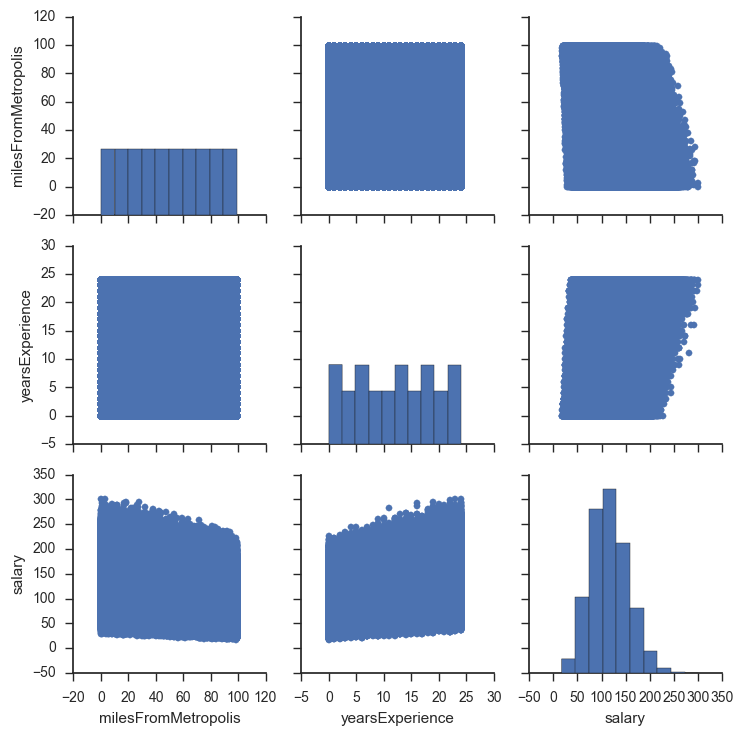

In [33]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(fea_salary_merge[['milesFromMetropolis','yearsExperience','salary']])

### Boxplot to show the distribution of salary conditioned on levels of categorical variables

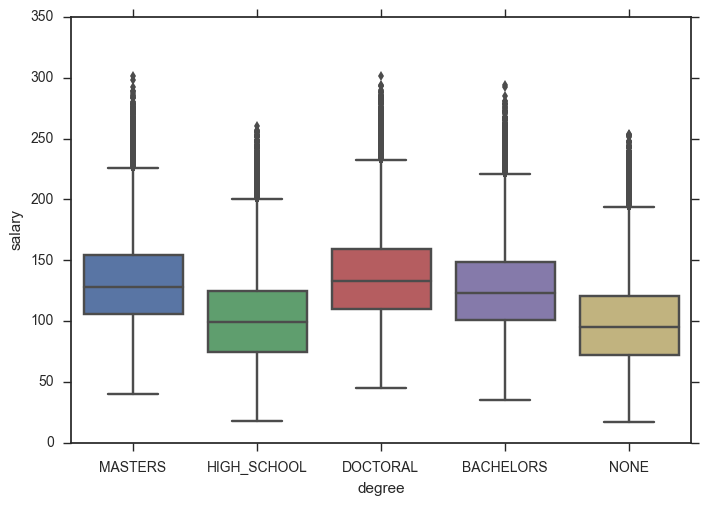

In [34]:
ax = sns.boxplot(x="degree", y="salary", data=fea_salary_merge)

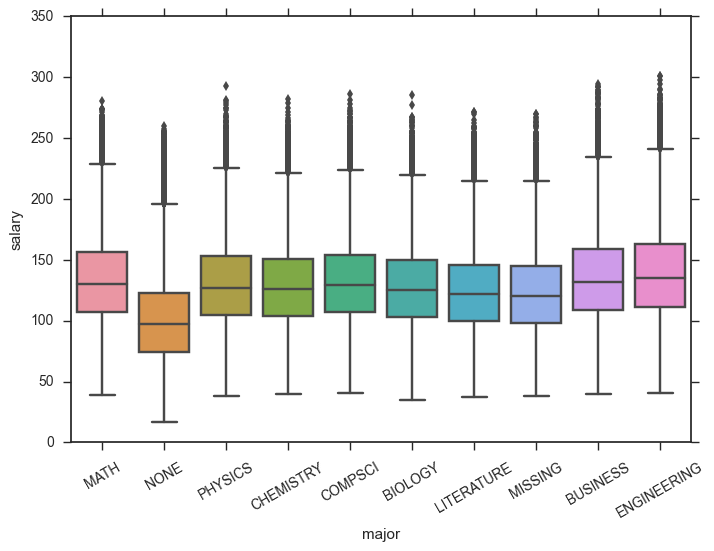

In [38]:
ax = sns.boxplot(x="major", y="salary", data=fea_salary_merge)
labels=["MATH","NONE","PHYSICS","CHEMISTRY","COMPSCI","BIOLOGY","LITERATURE","MISSING","BUSINESS","ENGINEERING"]
ax.set_xticklabels(labels,
                   rotation=30)

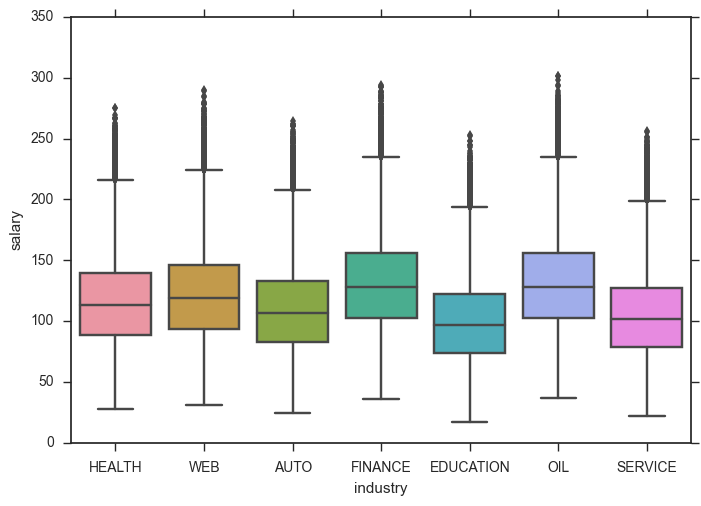

In [39]:
ax = sns.boxplot(x="industry", y="salary", data=fea_salary_merge)

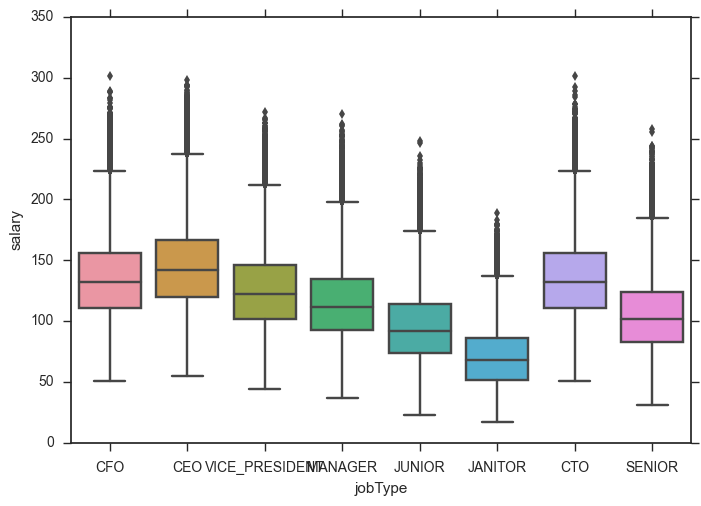

In [40]:
ax = sns.boxplot(x="jobType", y="salary", data=fea_salary_merge)


------Salary across companys is similar--------


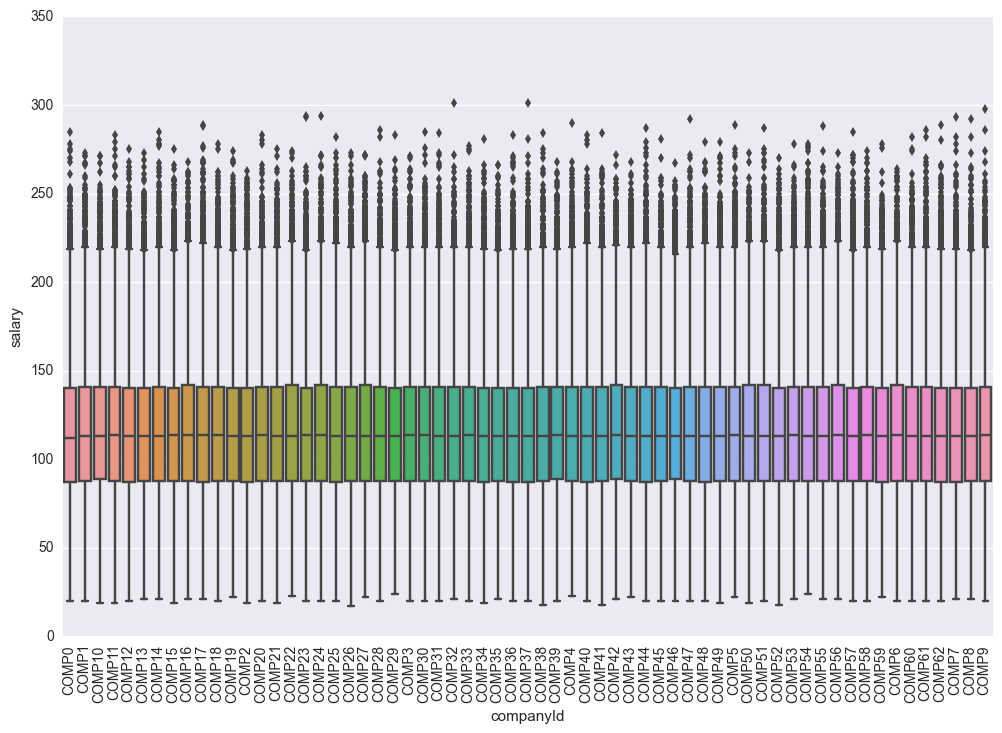

In [43]:
sns.set(rc={"figure.figsize": (12, 8)})
ax = sns.boxplot(x="companyId", y="salary", data=fea_salary_merge)
Company=list(np.unique(fea_salary_merge['companyId']))
ax.set_xticklabels(Company,rotation=90)
print()
print("------Salary across companys is similar--------")

# Data Encoding

In [39]:
from sklearn import preprocessing
feature_salary_cp=fea_salary_merge.copy()
feature_salary_cp.shape

(999995, 9)

### Data encoding for ordinal variables

In [40]:
degree_type=np.unique(fea_salary_merge['degree'])
job_type=np.unique(fea_salary_merge['jobType'])
print(degree_type)
print(job_type)
degree_dict=dict(zip(degree_type,[2,4,1,3,0]))
job_dict=dict(zip(job_type,[7,5,6,0,1,3,2,4]))
print(degree_dict)
print(job_dict)
feature_salary_cp['degree_label']=feature_salary_cp['degree'].apply(lambda x: degree_dict[x])
feature_salary_cp['jobtype_label']=feature_salary_cp['jobType'].apply(lambda x: job_dict[x])
print("--ORDINAL VARIABLES ENCODING DONE-----")

['BACHELORS' 'DOCTORAL' 'HIGH_SCHOOL' 'MASTERS' 'NONE']
['CEO' 'CFO' 'CTO' 'JANITOR' 'JUNIOR' 'MANAGER' 'SENIOR' 'VICE_PRESIDENT']
{'HIGH_SCHOOL': 1, 'DOCTORAL': 4, 'NONE': 0, 'BACHELORS': 2, 'MASTERS': 3}
{'JUNIOR': 1, 'CTO': 6, 'SENIOR': 2, 'MANAGER': 3, 'JANITOR': 0, 'VICE_PRESIDENT': 4, 'CFO': 5, 'CEO': 7}
--ORDINAL VARIABLES ENCODING DONE-----


### Data encoding for nominal variables(dummy one hot encoder)

In [41]:
label_encoder=[]
'''le1 = preprocessing.LabelEncoder()
le1.fit(feature_salary_cp['degree'])
feature_salary_cp['degree_label']=le1.transform(feature_salary_cp['degree'])
label_encoder.append(le1)'''

le2 = preprocessing.LabelEncoder()
le2.fit(feature_salary_cp['major'])
feature_salary_cp['major_label']=le2.transform(feature_salary_cp['major'])
label_encoder.append(le2)

le3 = preprocessing.LabelEncoder()
le3.fit(feature_salary_cp['industry'])
feature_salary_cp['industry_label']=le3.transform(feature_salary_cp['industry'])
label_encoder.append(le3)

'''le4 = preprocessing.LabelEncoder()
le4.fit(feature_salary_cp['jobType'])
feature_salary_cp['jobtype_label']=le4.transform(feature_salary_cp['jobType'])
label_encoder.append(le4)'''

'''le5 = preprocessing.LabelEncoder()
le5.fit(feature_salary_cp['companyId'])
feature_salary_cp['company_label']=le5.transform(feature_salary_cp['companyId'])
label_encoder.append(le5)'''

feature_salary_cp[['degree_label','major_label','industry_label','jobtype_label']].head()

,degree_label,major_label,industry_label,jobtype_label
0,3,6,3,5
1,1,8,6,7
2,4,9,3,4
3,4,2,0,3
4,2,9,2,4


In [42]:
enc = preprocessing.OneHotEncoder()
enc.fit(feature_salary_cp[['major_label','industry_label']])
feature_encode=enc.transform(feature_salary_cp[['major_label','industry_label']]).toarray()
feature_encode.shape

(999995, 17)

In [43]:
print("------column names for dummy variables-------")
print()
col_name=[]

start=0
for ind,i in enumerate(enc.feature_indices_[1:]):
    lookup=label_encoder[ind]
    #print lookup
    for j in range(i-start):
        col_name.append(lookup.inverse_transform(j))
    start=i
print(col_name)

------column names for dummy variables-------

['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'MISSING', 'NONE', 'PHYSICS', 'AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB']


### Integrate all the encoded variables with others

In [44]:
df_encode=pd.DataFrame(feature_encode,columns=col_name,dtype=int)
df_encode=df_encode.drop(["COMPSCI","FINANCE"],axis=1)
df_numerical=feature_salary_cp[['yearsExperience','milesFromMetropolis','salary','degree_label','jobtype_label']]
df_numerical.index=range(df_numerical.shape[0])
df_xy=df_encode.join(df_numerical)
print("---columns for all variables-----")
print(df_xy.columns)
print()
df_x=df_xy.drop(['salary'],axis=1)
print("---columns for all independent variables-----")
print(df_x.columns)
print()
df_y=df_xy['salary']

---columns for all variables-----
Index(['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'ENGINEERING', 'LITERATURE', 'MATH',
       'MISSING', 'NONE', 'PHYSICS', 'AUTO', 'EDUCATION', 'HEALTH', 'OIL',
       'SERVICE', 'WEB', 'yearsExperience', 'milesFromMetropolis', 'salary',
       'degree_label', 'jobtype_label'],
      dtype='object')

---columns for all independent variables-----
Index(['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'ENGINEERING', 'LITERATURE', 'MATH',
       'MISSING', 'NONE', 'PHYSICS', 'AUTO', 'EDUCATION', 'HEALTH', 'OIL',
       'SERVICE', 'WEB', 'yearsExperience', 'milesFromMetropolis',
       'degree_label', 'jobtype_label'],
      dtype='object')



### add two-way interaction terms

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)

## without salary but with intercept
df_poly=pd.DataFrame(poly.fit_transform(df_x))

## without salary and intercept
df_poly_w_o_intercept=pd.DataFrame(poly.fit_transform(df_x)[:,1:])

## with salary and no intercept
df_poly_w_salary=pd.DataFrame(poly.fit_transform(df_x)[:,1:])
df_poly_w_salary['salary']=df_xy['salary']

## with salary and intercept
df_poly_w_salary_intercept=df_poly.copy()
df_poly_w_salary_intercept['salary']=df_xy['salary']
df_poly_w_salary_intercept.head()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,salary
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,830,30,50,249,415,15,130
1,1,0,0,0,0,0,0,0,1,0,...,73,1,7,219,3,21,73,511,7,101
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,380,40,40,152,152,16,137
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,136,32,24,68,51,12,142
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,128,16,32,32,64,8,163


### column names of features

In [14]:
def Col_Name_Features(model,n=18):
    '''
    Get Significant Feature Names Selected by the Model
    ** model: model
    ** n: number of original feature
    return significant column names
    '''
    
    var,significant_col=[],[]
    for i in range(n):
       var.append('x'+str(i))
    var_dict=dict(zip(var,df_x.columns))
    
    for i in np.array(poly.get_feature_names()[1:])[model.coef_!=0]:
        if len(i.split(" "))==1:
           significant_col.append(var_dict[i])
        else:
            ls=""
            for j in i.split(" "):
                ls=ls+" "+var_dict[j]
            significant_col.append(ls)
            var_dict[i]=ls
    print(significant_col)
    return var_dict,significant_col    

# Model and Evaluation

In [20]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import linear_model
import scipy
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm



def PredictiveModel_CV(func,params,df,fold,verbose=False):
    '''
    EVALUATION MSE USING CROSS VALIDATION FOR PREDICTIVE MODELS
    GIVEN MODEL, PARAMETER AND DATA,  RETURN RMSE AND MODELS
    ** FUNC: MODEL FUNCTION IN SCIKIT LEARN
    ** PARAMS: PARAMETERS FOR THE MODEL
    ** DF: DATA
    ** VERBOSE: PRINT OUT MODEL RESULTS
    return models and rmse
    '''
    df_x=df.drop(['salary'],axis=1)
    df_y=df['salary']
    
    rmse,model=[],[]
    if fold>1: ## K fold cross validation
        kf = KFold(df.shape[0], n_folds=fold,shuffle=True)#K FOLD
        i=0
        for train, test in kf:
            ## TRAINING SET AND TESTING SET
            training_x,testing_x=df_x.iloc[train].values,df_x.iloc[test].values
            training_y,testing_y=df_y.iloc[train].values,df_y.iloc[test].values
            ### MODEL INITIALIZATION AND FIT
            reg = func(**params)
            reg.fit(scipy.sparse.csr_matrix(training_x),training_y)
            #print reg.coef_
            model.append(reg)
            ### MODEL PREDICTION
            y = reg.predict(testing_x)
            rmse_val=mean_squared_error(testing_y, y)
            print(rmse_val)
            rmse.append(rmse_val)

            ### PRINT OUT RESULT
            if verbose:
                print("model {}:".format(i))
                print()
                print("Mean squared error: %.2f"
                      % np.mean((reg.predict(testing_x) - testing_y) ** 2))
                # Explained variance score: 1 is perfect prediction
                print('Variance score: %.2f' % reg.score(testing_x,  testing_y))
                i+=1
    elif fold==0:  ## use the entire dataset
        
        reg = func(**params)
        reg.fit(scipy.sparse.csr_matrix(df_x.values),df_y.values)
        return rmse,reg
        
                
    else: 
        ### used when we just want to test out which algorithm performs best.
        
        
        X_train, X_test, y_train, y_test = train_test_split(df_x.values,
                                                    df_y.values)
        clf=func(**params)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        rmse_val=mean_squared_error(y_pred,y_test)
        print(rmse_val)
        rmse.append(rmse_val)
        model.append(clf)
        
            
    ### RETURN LIST OF RMSE AND LIST OF MODELS        
    return rmse,model





def HyperparameterTuning(clf,param_dist,n_iter_search):
    '''
    Hyperparameter Tuning using random search
    ** CLF: MODEL
    ** PARAM_DIST: PARAMETER DICTIONARY: specify parameters and distributions to sample from
    ** N_ITER_SEARCH: NUMBER OF ITERATION
    return search results
    '''
    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                      results['mean_test_score'][candidate],
                      results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")
    
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                       n_iter=n_iter_search)
    random_search.fit(X, y)
    report(random_search)
    return random_search



def SummaryModel_w_ALL(df_w_intercept,df_y,regularize=False,verbose=False):
    '''
    Use all data to get summary results(for regression mainly)
    **df_w_intercept: features with intercept
    **df_y: salary
    **regularize: whether to use regularized terms in the model(slow)
    **verbose: whether to print out the summary
    
    return fitted model
    '''
                                                    
    model1 = sm.OLS(df_y.values, df_w_intercept.values)
    if regularize:
        results = model1.fit_regularized()
    else:
        results = model1.fit()
    if verbose:
        print(results.summary())
    
    return results





### Regression and Lasso

In [46]:
rmse_REG,model_REG=PredictiveModel_CV(linear_model.LinearRegression,{},df_poly_w_salary,1)

362.410910531


In [18]:
rmse_lasso,model_lasso=PredictiveModel_CV(linear_model.Lasso,{"alpha":0.1},df_poly_w_salary,1)

379.91968816


### Random Forest and Gradient Boosting Trees

In [64]:
from sklearn.ensemble import RandomForestRegressor
params={'n_estimators': 30,'max_depth':20}
rmse_RF,model_RF=PredictiveModel(RandomForestRegressor,params,df_poly_w_salary,1)

381.404041

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

params={'n_estimators': 30,'max_depth':20}
rmse_RF,model_RF=PredictiveModel(GradientBoostingRegressor,params,df_poly_w_salary,1)

383.0561

### Model Trees and KNN

In [58]:
## Given those categories, assume the variation within a specific category 
## would not be so much, hence KNN could give good result
data1=fea_salary_merge[(fea_salary_merge.jobType=='CEO') &(fea_salary_merge.degree=='MASTERS') &(fea_salary_merge.major=='BIOLOGY')&\
                (fea_salary_merge.industry=='AUTO')][['yearsExperience','salary','milesFromMetropolis']]
data1.index=range(data1.shape[0])
data1.shape

(391, 3)

/Users/DG430B/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


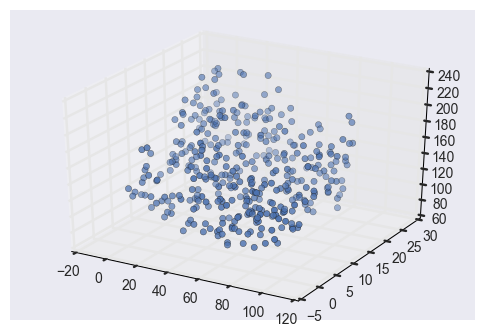

In [59]:
## 3d visualization to see the data
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(data1.milesFromMetropolis,data1.yearsExperience,data1.salary)#,c=data1.industry.apply(lambda x: colors[x])

### K-Nearest-Neighbor to predict salary

In [29]:
from sklearn.neighbors import KDTree
data_x=data1[['yearsExperience','milesFromMetropolis']]
data_y=data1['salary']
data_x=pd.DataFrame(preprocessing.scale(data_x))
rmse=[]
kf = KFold(data1.shape[0], n_folds=10,shuffle=True)

for train, test in kf:
    training_x,testing_x=data_x.iloc[train],data_x.iloc[test]
    training_y,testing_y=data_y.iloc[train],data_y.iloc[test]
    kdt = KDTree(training_x.values, leaf_size=30, metric='euclidean')
    dist,ind=kdt.query(testing_x.values, k=9)
    #print ind
    pred_y=pd.DataFrame(ind).apply(lambda x:sum(training_y.values[x])/9,axis=1)
    #print reg.coef_
    rmse.append(mean_squared_error(testing_y, pred_y))

In [30]:
np.mean(rmse)

463.14537995035062

### Multi-Layer Perceptron (Better perfomance than regression, but way hard to explain)

In [94]:
from sklearn.neural_network import MLPRegressor
rmse_mlp,model_mlp=PredictiveModel(MLPRegressor,{"activation":'logistic','hidden_layer_sizes':(20,100)},df_poly_w_salary)

In [96]:
np.mean(rmse_mlp)

[358.04444883286988,
 363.00513490156061,
 355.88861761731243,
 359.23937941589929,
 359.40404145872327,
 357.36527407992105,
 356.54013402588606,
 357.06025195272105,
 358.47671103712213,
 357.7777098033618]

### K prototypes Methods( too slow) 

### won't work well since even a specific category shown in the model tree method cannot provide accurate result

In [ ]:
### require install kmodes
from kmodes import kprototypes
X=fea_salary_merge[['jobType', 'degree', 'major', 'industry','yearsExperience', 'milesFromMetropolis']].values
Y=fea_salary_merge['salary'].values
X[:,:4]=X[:,:4].astype(object)
X[:,4:6]=X[:,4:6].astype(int)
print X.shape, Y.shape

In [ ]:
kproto = kprototypes.KPrototypes(n_clusters=6, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, categorical=[0, 1,2,3])

print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)


### Summary of linear models

In [57]:
results_OLS=SummaryModel_w_ALL(df_poly,df_y,verbose=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 2.251e+04
Date:                Tue, 25 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:20:28   Log-Likelihood:            -4.3661e+06
No. Observations:              999995   AIC:                         8.732e+06
Df Residuals:                  999855   BIC:                         8.734e+06
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         86.0368      0.567    151.774      0.0

### 10 fold cross validation for linear regression

In [21]:
rmse_REG,model_REG=PredictiveModel_CV(linear_model.LinearRegression,{},df_poly_w_salary,10)

363.139368065
360.668948441
360.521541338
360.7748321
364.361850976
363.439077155
361.503410775
363.682890757
362.267698567
364.15871302


### Feature selection using Lasso and find out significant terms

In [47]:
rmse_lasso,model_lasso=PredictiveModel_CV(linear_model.Lasso,{"alpha":0.1},df_poly_w_salary,0)

In [49]:
fea_dict,sign_col=Col_Name_Features(model_lasso,19)

['NONE', 'AUTO', 'EDUCATION', 'OIL', 'SERVICE', 'yearsExperience', 'milesFromMetropolis', 'degree_label', 'jobtype_label', ' BIOLOGY yearsExperience', ' BIOLOGY milesFromMetropolis', ' BIOLOGY jobtype_label', ' BUSINESS yearsExperience', ' BUSINESS milesFromMetropolis', ' BUSINESS degree_label', ' BUSINESS jobtype_label', ' CHEMISTRY yearsExperience', ' CHEMISTRY milesFromMetropolis', ' ENGINEERING yearsExperience', ' ENGINEERING milesFromMetropolis', ' ENGINEERING degree_label', ' ENGINEERING jobtype_label', ' LITERATURE yearsExperience', ' LITERATURE milesFromMetropolis', ' LITERATURE jobtype_label', ' MATH yearsExperience', ' MATH milesFromMetropolis', ' MATH degree_label', ' MISSING yearsExperience', ' MISSING milesFromMetropolis', ' MISSING degree_label', ' MISSING jobtype_label', ' NONE yearsExperience', ' NONE milesFromMetropolis', ' NONE degree_label', ' NONE jobtype_label', ' PHYSICS milesFromMetropolis', ' AUTO yearsExperience', ' AUTO milesFromMetropolis', ' AUTO degree_labe

In [50]:
## find the greatest impact term
print("most significant term with positive coefficient:")
print(fea_dict[np.array(poly.get_feature_names()[1:])[np.argmax(model_lasso.coef_)]])
print()
print("its corresponding coefficient")
model_lasso.coef_[np.argmax(model_lasso.coef_)]

most significant term with positive coefficient:
jobtype_label

its corresponding coefficient


8.7990071810631356

In [51]:
print("most significant term with negative coefficient:")
print(fea_dict[np.array(poly.get_feature_names()[1:])[np.argmin(model_lasso.coef_)]])
print()
print("its corresponding coefficient")
model_lasso.coef_[np.argmin(model_lasso.coef_)]


most significant term with negative coefficient:
EDUCATION

its corresponding coefficient


-12.105651402250443

In [56]:
print("Descending Order for feature significance")
[fea_dict[np.array(poly.get_feature_names()[1:])[i]] for i in np.argsort(abs(model_lasso.coef_))[::-1] if model_lasso.coef_[i]!=0]

Descending Order for feature significance


['EDUCATION',
 'jobtype_label',
 'SERVICE',
 'degree_label',
 'OIL',
 'NONE',
 'yearsExperience',
 'AUTO',
 ' ENGINEERING degree_label',
 ' EDUCATION degree_label',
 ' SERVICE degree_label',
 ' AUTO degree_label',
 ' NONE degree_label',
 ' EDUCATION jobtype_label',
 ' SERVICE jobtype_label',
 ' AUTO jobtype_label',
 ' BUSINESS degree_label',
 ' HEALTH jobtype_label',
 ' NONE jobtype_label',
 ' EDUCATION yearsExperience',
 ' SERVICE yearsExperience',
 ' AUTO yearsExperience',
 ' MISSING jobtype_label',
 ' HEALTH yearsExperience',
 ' LITERATURE jobtype_label',
 ' MISSING degree_label',
 ' WEB yearsExperience',
 ' ENGINEERING jobtype_label',
 ' HEALTH degree_label',
 ' NONE yearsExperience',
 ' MATH degree_label',
 ' LITERATURE yearsExperience',
 ' MISSING yearsExperience',
 ' AUTO milesFromMetropolis',
 ' EDUCATION milesFromMetropolis',
 ' SERVICE milesFromMetropolis',
 ' ENGINEERING yearsExperience',
 ' HEALTH milesFromMetropolis',
 ' OIL yearsExperience',
 ' WEB jobtype_label',
 ' BUSI

### Interaction terms are least significant, also milesFromMetropolis is also one of the least significant terms.  Education, jobtype label, service, degree_label are most significant terms

## Prediction on testing dataset

In [22]:
test_data=pd.read_csv("test_features_2013-03-07.csv")
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [81]:
len(np.unique(test_data['companyId']))

63

In [79]:
##check categories
print('jobtype category:')
print(features['jobType'].value_counts())

print("---------------------")
print('industry category:')
print(features['industry'].value_counts())

print("---------------------")
print('degree category:')
print(features['degree'].value_counts())

print("---------------------")
print('major category:')
print(features['major'].value_counts())

print("---------------------")

jobtype category:
SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64
---------------------
industry category:
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64
---------------------
degree category:
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64
---------------------
major category:
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64
---------------------


In [23]:
print("----------check if there is NULL in this dataset------------")
print(test_data.apply(pd.notnull).all(axis=0))

print()
print()
print("---------check descriptive statistics for two continuous variables-------")
print(test_data.describe())

----------check if there is NULL in this dataset------------
jobId                  True
companyId              True
jobType                True
degree                 True
major                  True
industry               True
yearsExperience        True
milesFromMetropolis    True
dtype: bool


---------check descriptive statistics for two continuous variables-------
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000


In [58]:
print("------count group by degree----------")
print()
print(test_data[['degree','major']].groupby(['degree']).count())

print("------count group by major-----------")
print()
print(test_data[['major','degree']].groupby(['major']).count())

print()
print("MISSING type also exists")


------count group by degree----------

              major
degree             
BACHELORS    173937
DOCTORAL     175105
HIGH_SCHOOL  238255
MASTERS      175236
NONE         237467
------count group by major-----------

             degree
major              
BIOLOGY       58804
BUSINESS      57961
CHEMISTRY     58159
COMPSCI       58385
ENGINEERING   58496
LITERATURE    58062
MATH          57817
NONE         534068
PHYSICS       58248

MISSING type also exists


### Encode features

In [59]:
test_data['degree_label']=test_data['degree'].apply(lambda x: degree_dict[x])
test_data['jobtype_label']=test_data['jobType'].apply(lambda x: job_dict[x])
test_data['major_label']=le2.transform(test_data['major'])
test_data['industry_label']=le3.transform(test_data['industry'])
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_label,jobtype_label,major_label,industry_label
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,1,3,8,3
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,0,1,8,0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,3,6,0,3
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,1,3,8,4
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,4,1,0,4


In [67]:
feature_encode_test=enc.transform(test_data[['major_label','industry_label']]).toarray()
feature_encode_test.shape

(1000000, 17)

In [70]:
df_encode_test=pd.DataFrame(feature_encode_test,columns=col_name,dtype=int)
df_encode_test=df_encode_test.drop(["COMPSCI","FINANCE"],axis=1)
df_numerical_test=test_data[['yearsExperience','milesFromMetropolis','degree_label','jobtype_label']]
df_numerical_test.index=range(df_numerical_test.shape[0])
df_xy_test=df_encode_test.join(df_numerical_test)
print("---columns for all variables-----")
print(df_xy_test.columns)
print()

---columns for all variables-----
Index(['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'ENGINEERING', 'LITERATURE', 'MATH',
       'MISSING', 'NONE', 'PHYSICS', 'AUTO', 'EDUCATION', 'HEALTH', 'OIL',
       'SERVICE', 'WEB', 'yearsExperience', 'milesFromMetropolis',
       'degree_label', 'jobtype_label'],
      dtype='object')



### Prediction

In [71]:
df_poly_test=pd.DataFrame(poly.fit_transform(df_xy_test))
df_poly_test.shape

(1000000, 191)

In [72]:
y_test=results_OLS.predict(df_poly_test)
y_test

array([ 107.79035815,   92.46180784,  186.48603492, ...,   56.07485115,
        165.60733088,  112.12742753])

In [73]:
test_data['salary']=y_test
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_label,jobtype_label,major_label,industry_label,salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,1,3,8,3,107.790358
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,0,1,8,0,92.461808
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,3,6,0,3,186.486035
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,1,3,8,4,100.240431
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,4,1,0,4,117.916889


In [74]:
test_data[['jobId','salary']].to_csv("test_salaries_2013-03-07.csv",index=False)